In [122]:
from scipy import integrate
from scipy.special import hermite

Here I have been trying plot original and quaziclassic approximate to oscillatory functions.
Classic:
$$
\Psi_n(Q) = \frac{1}{\pi^{1/4} \sqrt{2^{n} n!}} e^{-Q^2/2} \cdot H_n(Q),
$$
where $H_n$ - Hermite polynomials.
Approximate solution
$$
\Psi_n(Q>0)
= \begin{cases}
 \frac{c_n}{(-Q^2/(2n+1)+1)^{1/4}} \cdot \cos(\phi_n(Q) - \pi/4)& \text{if } Q < \sqrt{2n+1}  \\
 \frac{c_n}{2 (-1 + Q^2/(2n+1))^{1/4}} \cdot e^{-\gamma_n(Q)}& \text{else}  
\end{cases}
$$
We should define $\phi_n(Q)$:
$$
\phi_n(Q) = (2n+1) \int_{\frac{Q}{\sqrt{2n+1}}}^1 \sqrt{1-y^2}dy
$$
and $\gamma_n(Q)$:

$$
\gamma_n(Q) = (2n+1) \int_{1}^{\frac{Q}{\sqrt{2n+1}}} \sqrt{y^2-1} dy
$$

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial 
import matplotlib.patches as mpatches

In [14]:
def f_n(n, q):
    return (2*n +1)* (integrate.quad(lambda y:np.sqrt(1-y**2),q/np.sqrt(2*n+1),1)[0])

In [15]:
def g_n(n, q):
    return (2*n +1)* (integrate.quad(lambda y:np.sqrt(y**2-1),1, q/np.sqrt(2*n+1))[0])

In [121]:
def psi_n(n, q):
    if q < np.sqrt(2*n+1):
        psi = np.cos(f_n(n,q) - np.pi/4)/(1 -q**2/(2*n+1))**(1/4)
    else:
        psi = np.exp(-g_n(n,q))/(q**2/(2*n+1)-1)**(1/4)/2
    return psi

<IPython.core.display.Javascript object>


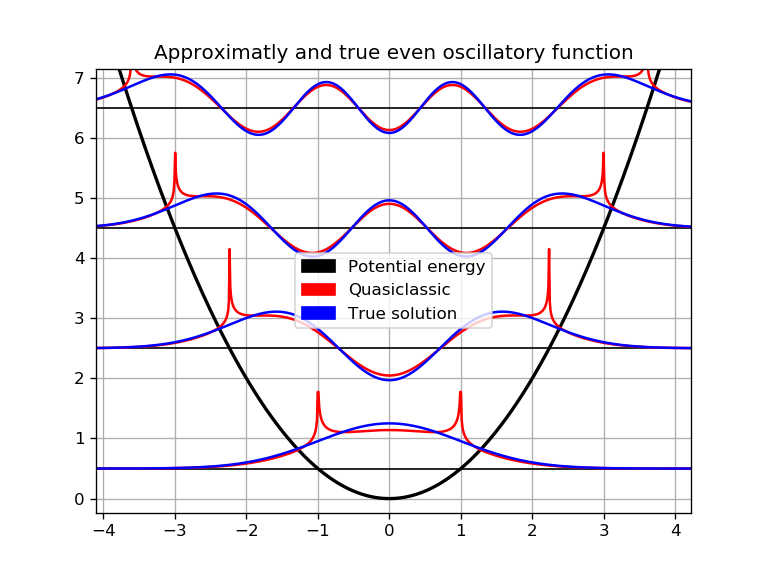

C:\Users\polina\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [123]:
%matplotlib notebook
plt.figure()
q = np.linspace(-5, 5, 1000)
U = q**2/2
plt.plot(q, U,color = 'black',label='Potential energy',lw = 2)
for n in range(0,7,2):
    E_n = n + 1/2
    H_n = hermite(n)
    q = np.linspace(0, 5, 500)
    psi = q.copy()
    psi_tru = q.copy()
    sc1 = integrate.quad(lambda x: (psi_n(n , x))**2,0, 1/np.sqrt(2*n+1)-0.01)[0]
    sc2 = integrate.quad(lambda x: (psi_n(n , x))**2,1/np.sqrt(2*n+1)+0.01, np.inf)[0]
    sc = sc1+sc2
    c_n  = 1 / np.sqrt(2*sc)
    #s = integrate.quad(lambda x: (np.exp((-x**2/2))* H_n(x)/np.pi**(1/4)/np.sqrt(2**n * factorial(n)))**2,-np.inf, np.inf)[0]
    for i in range(q.shape[0]):
        psi[i] = c_n*psi_n(n, q[i])
        psi_tru[i] = np.exp((-q[i]**2/2))* H_n(q[i])/np.pi**(1/4)/np.sqrt(2**n * factorial(n))
    q_neg = -q.copy()[::-1]
    psi_neg = (-1)**(n)*psi.copy()[::-1]
    psi_tru_neg = (-1)**n*psi_tru.copy()[::-1]
    q = np.concatenate((q_neg, q))
    psi = np.concatenate((psi_neg, psi))
    psi_tru = np.concatenate((psi_tru_neg, psi_tru))
    plt.plot(q, psi+E_n, color='red')
    plt.plot(q, psi_tru+E_n, color='blue')
    plt.hlines(E_n, -5, 5,lw=1)
plt.title('Approximatly and true even oscillatory function')
red_patch = mpatches.Patch(color='red', label='Quasiclassic')
blue_patch = mpatches.Patch(color='blue', label='True solution')
black_patch = mpatches.Patch(color='black', label='Potential energy')
plt.legend(handles=[black_patch, red_patch, blue_patch])
#plt.legend()
plt.grid()

<IPython.core.display.Javascript object>


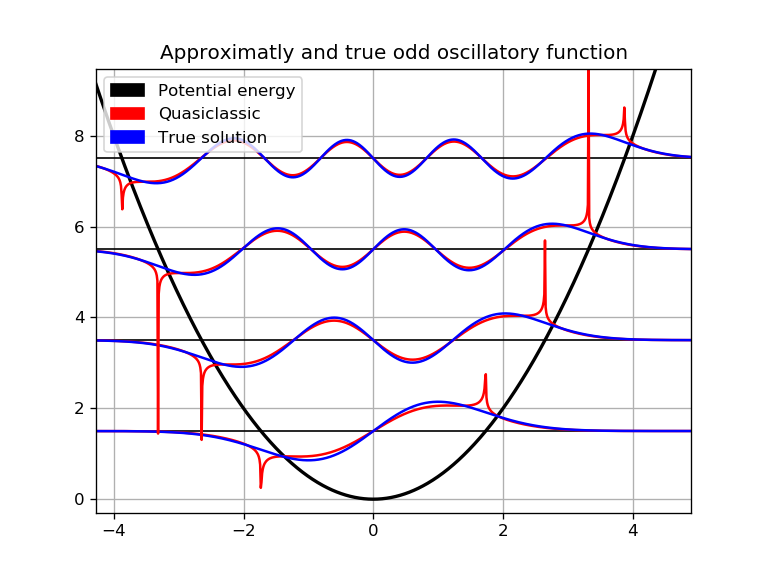

C:\Users\polina\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [124]:
%matplotlib notebook
plt.figure()
q = np.linspace(-5, 5, 1000)
U = q**2/2
plt.plot(q, U,color = 'black',label='Potential energy',lw = 2)
for n in range(1,8,2):
    E_n = n + 1/2
    H_n = hermite(n)
    q = np.linspace(0, 5, 500)
    psi = q.copy()
    psi_tru = q.copy()
    sc1 = integrate.quad(lambda x: (psi_n(n , x))**2,0, 1/np.sqrt(2*n+1)-0.01)[0]
    sc2 = integrate.quad(lambda x: (psi_n(n , x))**2,1/np.sqrt(2*n+1)+0.01, np.inf)[0]
    sc = sc1+sc2
    c_n  = 1 / np.sqrt(2*sc)
    #s = integrate.quad(lambda x: (np.exp((-x**2/2))* H_n(x)/np.pi**(1/4)/np.sqrt(2**n * factorial(n)))**2,-np.inf, np.inf)[0]
    for i in range(q.shape[0]):
        psi[i] = c_n*psi_n(n, q[i])
        psi_tru[i] = np.exp((-q[i]**2/2))* H_n(q[i])/np.pi**(1/4)/np.sqrt(2**n * factorial(n))
    q_neg = -q.copy()[::-1]
    psi_neg = (-1)**(n)*psi.copy()[::-1]
    psi_tru_neg = (-1)**n*psi_tru.copy()[::-1]
    q = np.concatenate((q_neg, q))
    psi = np.concatenate((psi_neg, psi))
    psi_tru = np.concatenate((psi_tru_neg, psi_tru))
    plt.plot(q, psi+E_n, color='red')
    plt.plot(q, psi_tru+E_n, color='blue')
    plt.hlines(E_n, -5, 5,lw=1)
plt.title('Approximatly and true odd oscillatory function')
red_patch = mpatches.Patch(color='red', label='Quasiclassic')
blue_patch = mpatches.Patch(color='blue', label='True solution')
black_patch = mpatches.Patch(color='black', label='Potential energy')
plt.legend(handles=[black_patch, red_patch, blue_patch])
#plt.legend()
plt.grid()